Problem Statement:

About Company
* Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

Problem
* The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.

In [31]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

In [32]:
# read the data
train = pd.read_csv('loan_sanction_train.csv')

In [33]:
# get the information about the column names, data types and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [34]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
# look at the firat few rows of the data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
# get the percentage of missing values in each column
train.isna().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [37]:
# get the unique values in each column
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Univariate Analysis

## Loan Status

In [38]:
# Check the target varaible for distribution of classes
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## Loan_ID

In [39]:
# check whether Loan_ID is unique
train['Loan_ID'].is_unique

True

In [40]:
# drop the Loan_ID from the data
train.drop(columns=['Loan_ID'], inplace=True)

## Gender

In [41]:
# check the value counts for gender
train['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

## Married

In [42]:
# check the value counts for Married
train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

## Dependents

In [43]:
# check the value counts for Dependents
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

## Education

In [44]:
# check the value counts for Education
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

## Self-Employed

In [45]:
# check the value counts for Self-Employed
train['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [46]:
# Write down your inferences from above analysis
# at least 1-1 points about every feature 

## Applicant Income

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

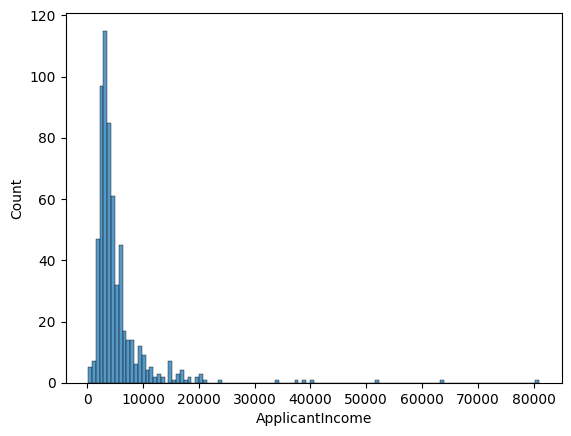

In [47]:
# check the distribution of ApplicantIncome
sns.histplot(train['ApplicantIncome'])

## Coapplicant Income

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

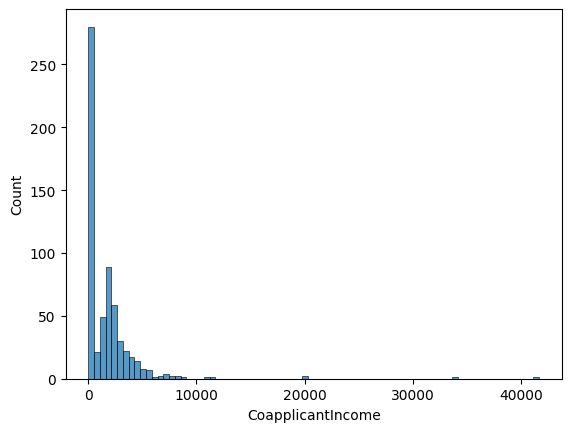

In [48]:
# check the distribution of CoapplicantIncome
sns.histplot(train['CoapplicantIncome'])

## Loan Amount

<Axes: xlabel='LoanAmount', ylabel='Count'>

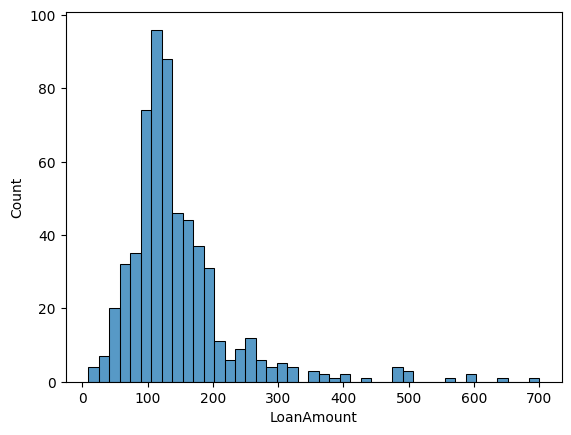

In [49]:
# check the distribution of LoanAmount
sns.histplot(train['LoanAmount'])

## Loan Amount Term

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

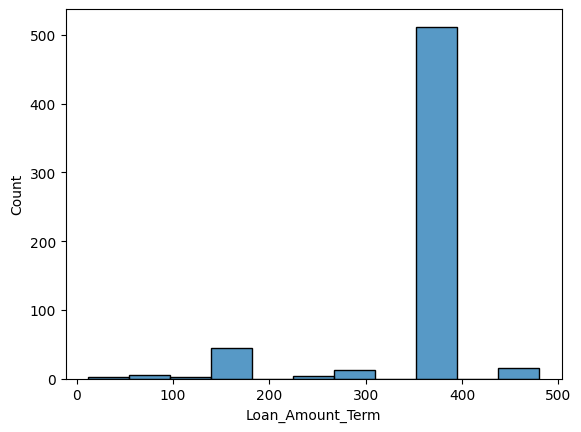

In [50]:
# check the distribution of Loan_Amount_Term
sns.histplot(train['Loan_Amount_Term'])

## Credit History

In [51]:
# check the value counts of Credit_History
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

## Property Area

In [52]:
# check the distribution of Property_Area
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## create categorical and continuous columns list

In [53]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                       'Credit_History', 'Property_Area', 'Loan_Status']

In [54]:
continuous_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

## Count plot

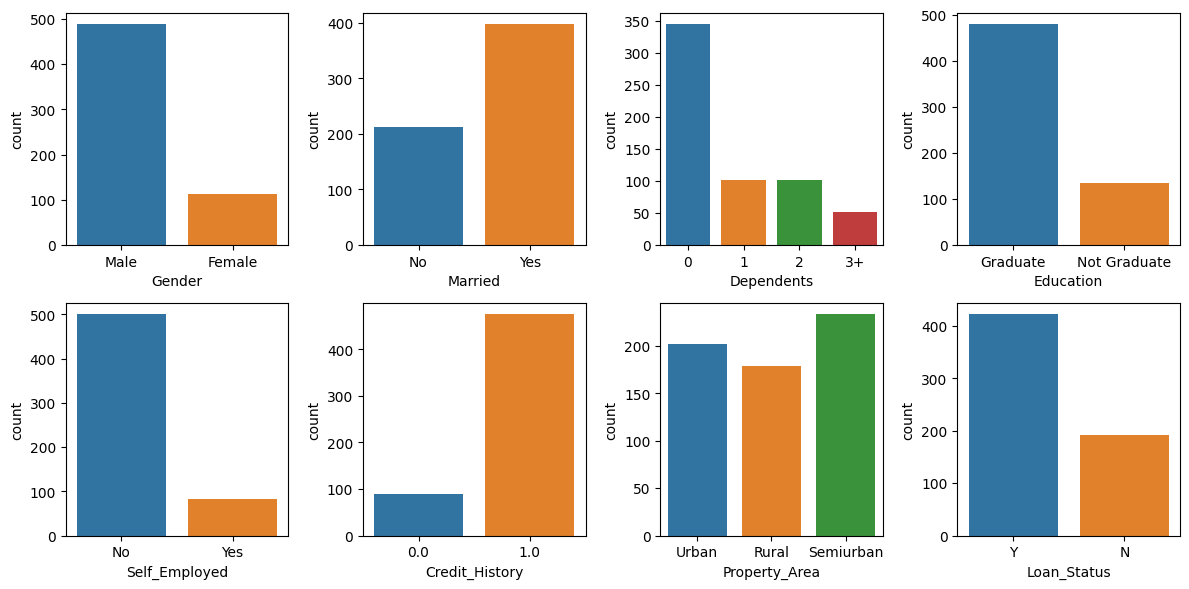

In [55]:
# Create count plots for all the categorical columns
fig, axes = plt.subplots(2, 4, figsize=(12,6))
for i, ax in enumerate(axes.ravel()):
    sns.countplot(x=train[categorical_columns[i]], ax=ax)
plt.tight_layout()

## Box plot

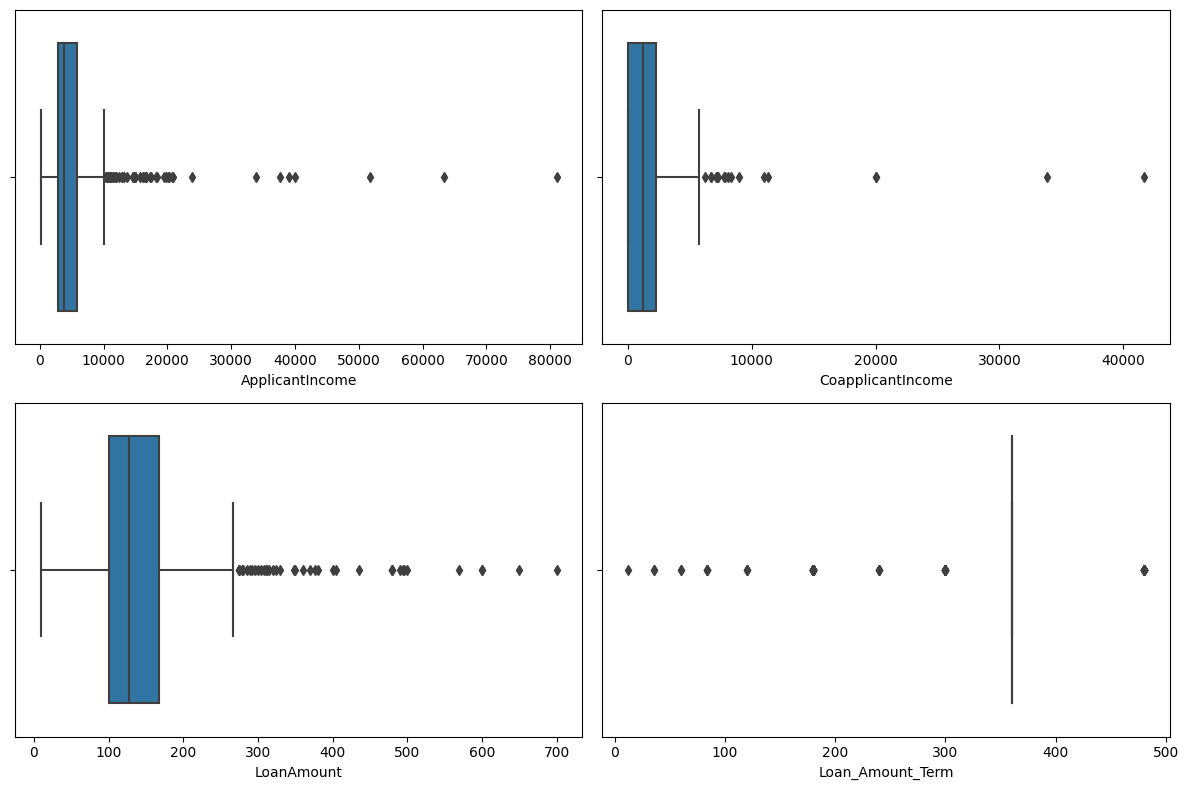

In [56]:
# create box plot for all continuous columns
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.boxplot(x=train[continuous_columns[i]], ax=ax)
plt.tight_layout()

## Inferences

In [57]:
# wrire inferences about the univariate analysis done above

# Bi-variate analysis

## continuous variables with target variable

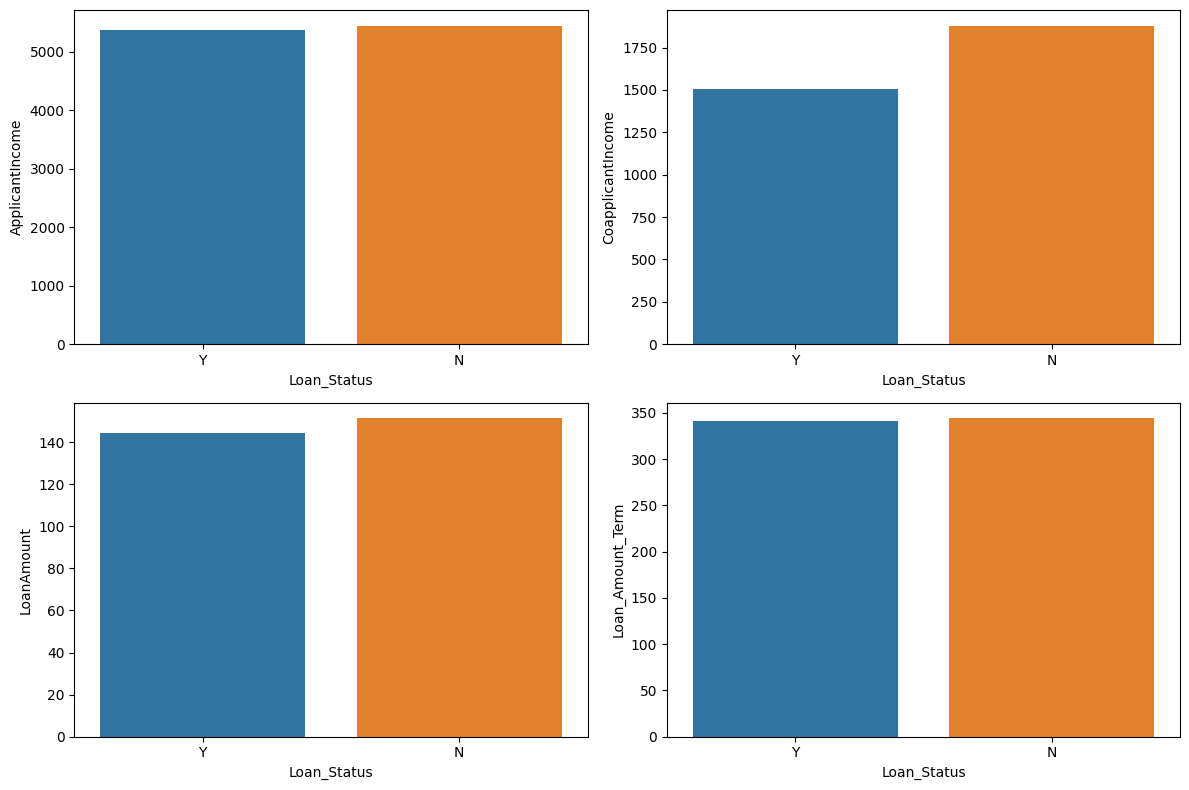

In [58]:
# Create barplot with continuous variables and target variable
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(y=train[continuous_columns[i]], x=train['Loan_Status'], ax=ax, errorbar=None)
plt.tight_layout()

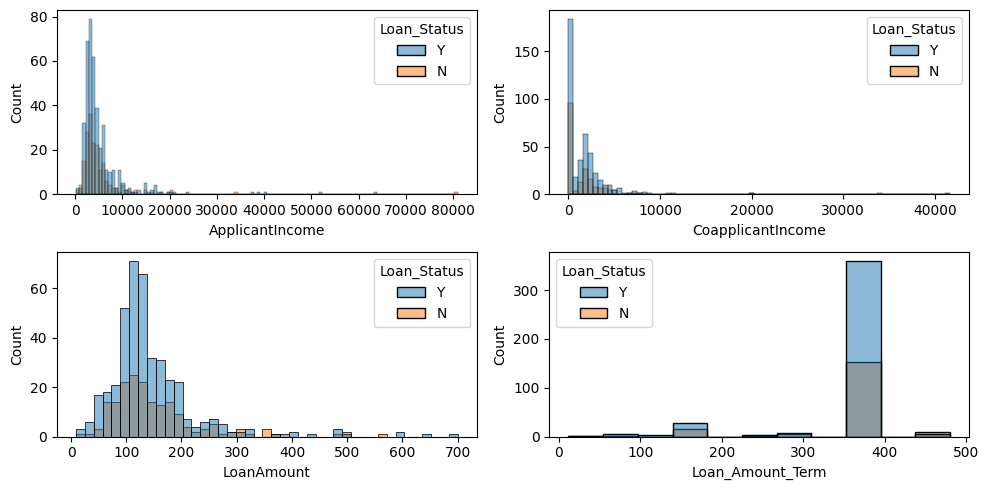

In [59]:
# Create histogram with continuous variables and target variable as hue
fig, axes = plt.subplots(2, 2, figsize=(10,5))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(data=train, x=continuous_columns[i], hue='Loan_Status', ax=ax)
plt.tight_layout()

## categorical variables with target variable

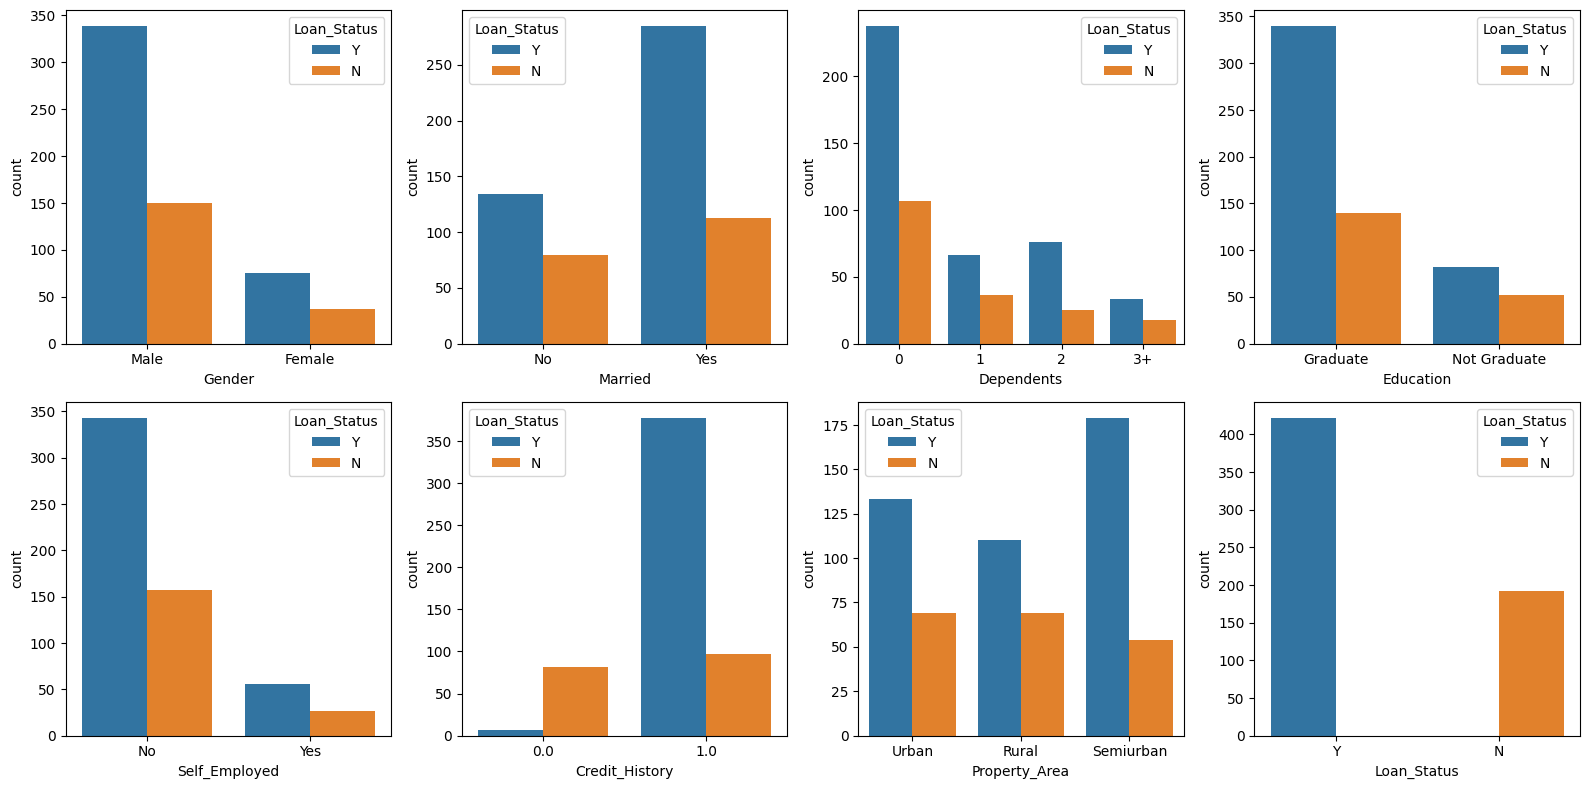

In [60]:
# Create count plot with categorical variables and target variable
fig, axes = plt.subplots(2, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.countplot(x=train[categorical_columns[i]], hue=train['Loan_Status'], ax=ax)
plt.tight_layout()

## heatamp of correlations

<Axes: >

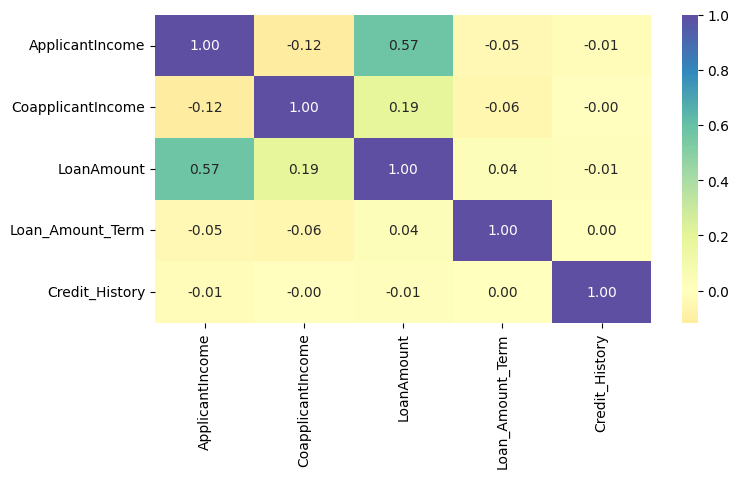

In [61]:
# plot heatmap of correlations
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='Spectral', center=0, fmt='.2f')

## Pair plot

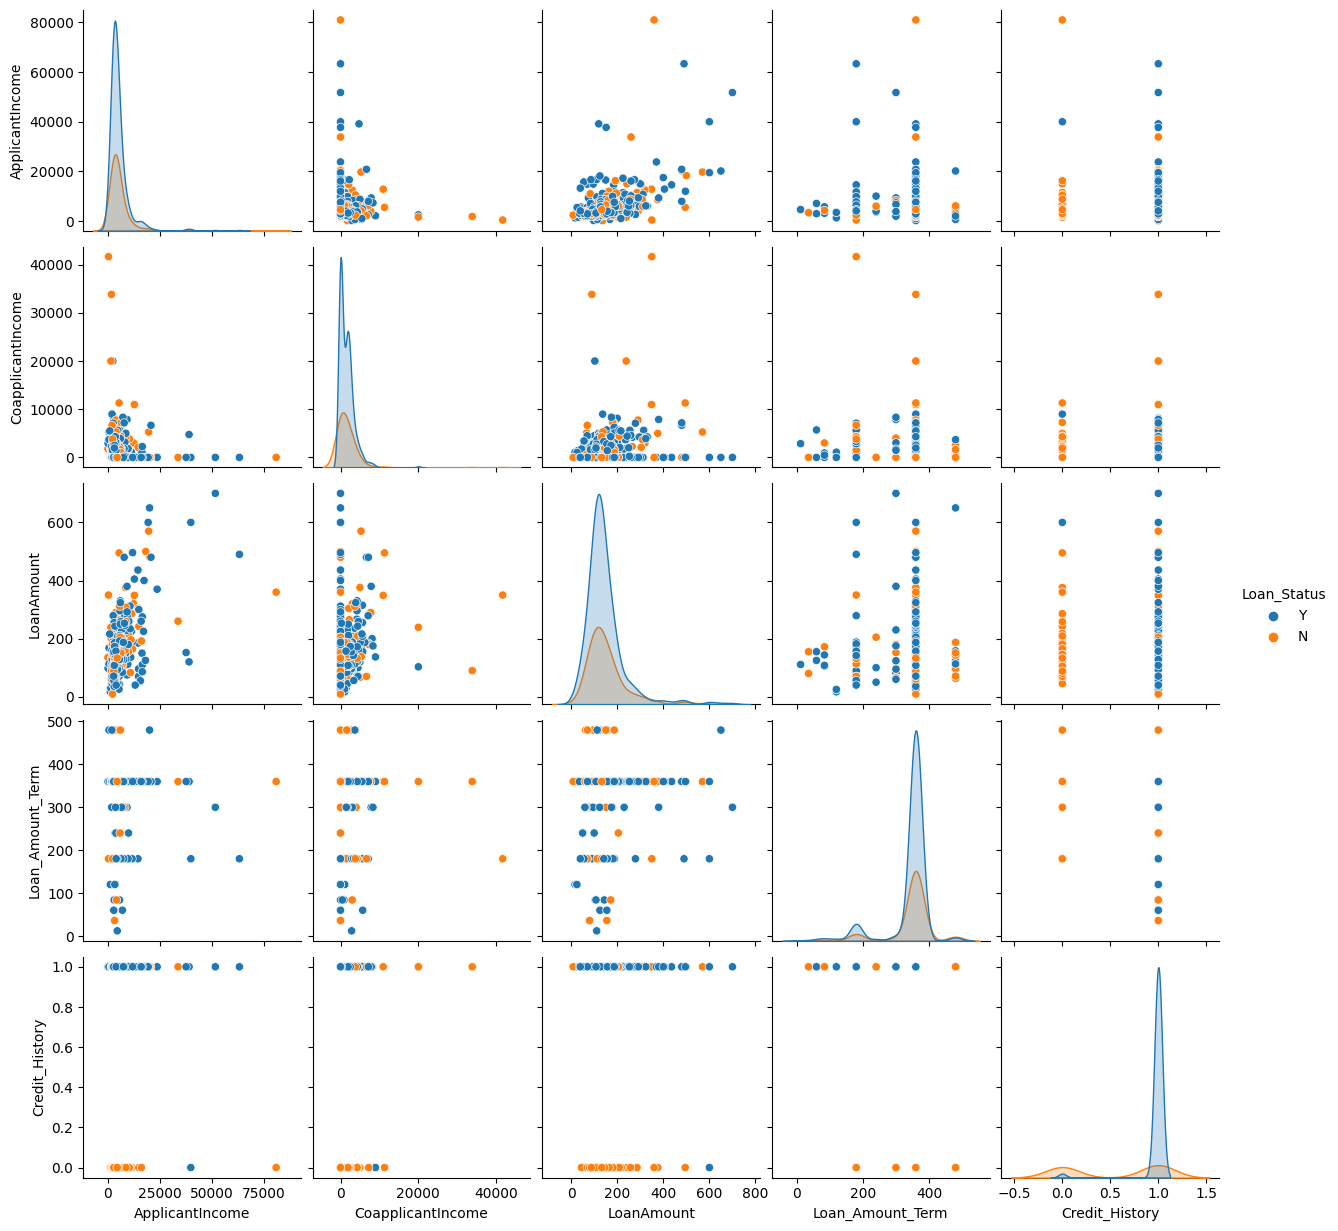

In [62]:
# create pair plot with target variable as hue
sns.pairplot(data=train, hue='Loan_Status')

## Inferences

In [63]:
# 1. write down your inferences about the Univariate, Bivaraite and Multivariate analysis done above
# 2. Some multivariate plots (3 or more variables)
# 3. Convert some of those inferences into H0 & HA, esp. two-sample tests for proportions and means. 
# Aslo inferences for Chi-square tests




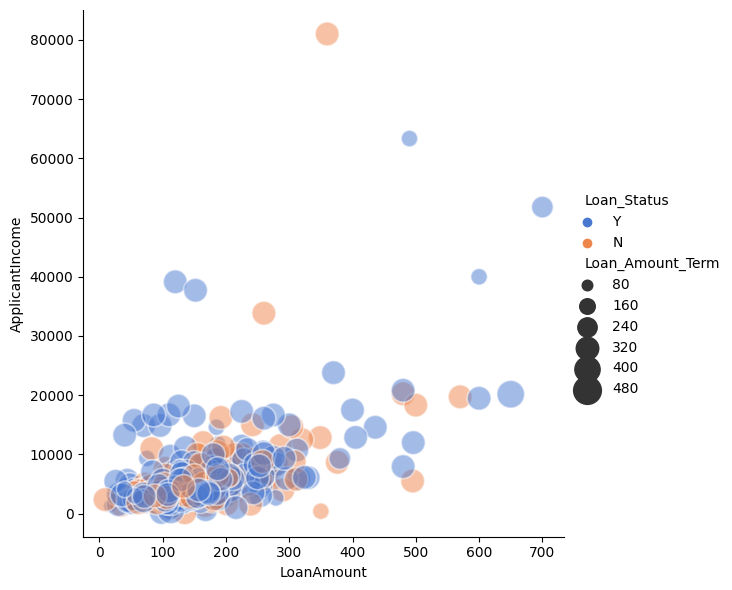

In [64]:
sns.relplot(data=train,x="LoanAmount", y="ApplicantIncome", hue="Loan_Status", size="Loan_Amount_Term", sizes=(0, 400), alpha=.5, palette="muted", height=6)

In [ ]:
# https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot/

In [81]:
df = train.copy()

In [82]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
df[col].mode()[0]

'Y'

In [83]:
# To imoute the missing values, use Mode for Cat, Median for Numeric var
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [84]:
for col in continuous_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [85]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# HA: Applicants with an income > 20000 are more likely to get a loan
# H0: Applicants with an income <= 20000 are more likely to get a loan
# # right tailed test

In [98]:
from scipy.stats import norm

# Calculate the proportions of loan approval for income > 20000 and income <= 20000
income_gt_20000 = df[df['ApplicantIncome'] > 20000]
income_le_20000 = df[df['ApplicantIncome'] <= 20000]

p1 = income_gt_20000['Loan_Status'].map({'Y': 1, 'N': 0}).mean()
p2 = income_le_20000['Loan_Status'].map({'Y': 1, 'N': 0}).mean()

p1, p2

(0.6666666666666666, 0.6877076411960132)

In [101]:
# Calculate the standard errors for the proportions
n1 = len(income_gt_20000)
n2 = len(income_le_20000)
n1, n2

(12, 602)

In [100]:
se1 = np.sqrt(p1 * (1 - p1) / n1)
se2 = np.sqrt(p2 * (1 - p2) / n2)

# Calculate the z-score
z = (p1 - p2) / np.sqrt(se1**2 + se2**2)

# Calculate the p-value
p_value = norm.sf(z)

# Print the results
print("Two-sample Z-test for Proportions Results:")
print(f"Z-Score: {z}")
print(f"P-Value: {p_value}")

Two-sample Z-test for Proportions Results:
Z-Score: -0.15315078831467144
P-Value: 0.5608603175133945


In [114]:
# Ho : The number of dependents DOED NOT AFFECT the chances of loan approval
# HA: The number of dependents AFFECTS the chances of loan approval

from scipy.stats import chi2_contingency

# Create a contingency table between loan status and marital status
contingency_table = pd.crosstab(df['Dependents'], df['Loan_Status'])
contingency_table

Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


In [115]:
# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square Test of Independence Results:")
print(f"Chi-square Statistic: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Concl: Fail to Reject Ho 
# There is significant (or very strong) evidence that the number of dependents DOED NOT AFFECT the chances of loan approval

Chi-square Test of Independence Results:
Chi-square Statistic: 3.1513990012324227
P-Value: 0.3688663081366005
Degrees of Freedom: 3
Expected Frequencies:
[[112.5732899  247.4267101 ]
 [ 31.89576547  70.10423453]
 [ 31.58306189  69.41693811]
 [ 15.94788274  35.05211726]]


In [117]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [122]:
# Hypothesis : Applicants having 0 dependents have higher chance of loan approval
# HA: Applicants having 0 dependents have different chances of loan approval
# Ho: Applicants having 0 dependents have EQUAL chance of loan approval, compared to other 

from scipy.stats import norm

# Create subsets for Semiurban and other Property_Area categories
dep_2 = df[df['Dependents'] == '2']
others = df[df['Dependents'] != '2']

# Calculate the proportions of loan approval for Semiurban and other Property_Area categories
p1 = dep_2['Loan_Status'].map({'Y': 1, 'N': 0}).mean()
p2 = others['Loan_Status'].map({'Y': 1, 'N': 0}).mean()

p1, p2

(0.7524752475247525, 0.6744639376218323)

In [123]:
# Calculate the standard errors for the proportions
n1 = len(dep_2)
n2 = len(others)

se1 = np.sqrt(p1 * (1 - p1) / n1)
se2 = np.sqrt(p2 * (1 - p2) / n2)

# Calculate the z-score
z = (p1 - p2) / np.sqrt(se1**2 + se2**2)

# Calculate the p-value
p_value = norm.sf(z)

# Print the results
print("Two-sample Z-test for Proportions Results:")
print(f"Z-Score: {z}")
print(f"P-Value: {p_value}")

# Conl: Reject H0
# Concl: Applicants having 2 dependents have a very slightly greater chance of loan approval, compared to others

Two-sample Z-test for Proportions Results:
Z-Score: 1.636598413633413
P-Value: 0.050857203658410906


In [106]:
# Hypothesis : Applicants from Semiurban areas have a higher chance of loan approval
# HA: Applicants from Semiurban areas have different chances of loan approval
# Ho: Applicants from Semiurban areas have EQUAL chance of loan approval, compared to other 
# property areas

from scipy.stats import norm

# Create subsets for Semiurban and other Property_Area categories
semiurban = df[df['Property_Area'] == 'Semiurban']
others = df[df['Property_Area'] != 'Semiurban']

# Calculate the proportions of loan approval for Semiurban and other Property_Area categories
p1 = semiurban['Loan_Status'].map({'Y': 1, 'N': 0}).mean()
p2 = others['Loan_Status'].map({'Y': 1, 'N': 0}).mean()

p1, p2

(0.7682403433476395, 0.6377952755905512)

In [107]:
# Calculate the standard errors for the proportions
n1 = len(semiurban)
n2 = len(others)

se1 = np.sqrt(p1 * (1 - p1) / n1)
se2 = np.sqrt(p2 * (1 - p2) / n2)

# Calculate the z-score
z = (p1 - p2) / np.sqrt(se1**2 + se2**2)

# Calculate the p-value
p_value = norm.sf(z)

# Print the results
print("Two-sample Z-test for Proportions Results:")
print(f"Z-Score: {z}")
print(f"P-Value: {p_value}")

# Conl: Reject H0

Two-sample Z-test for Proportions Results:
Z-Score: 3.523634819024429
P-Value: 0.0002128352396534065


In [86]:
## H0: Loan approval status is independent of co-applicant income
# HA: Loan approval status is dependent of co-applicant income

from scipy.stats import ttest_ind

# Select co-applicant income for approved loans and not approved loans
income_approved = df.loc[df['Loan_Status'] == 'Y', 'CoapplicantIncome']
income_not_approved = df.loc[df['Loan_Status'] == 'N', 'CoapplicantIncome']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(income_approved, income_not_approved, equal_var=False)
t_stat, p_value
# We fail to Reject H0
# Loan approval status is independent of co-applicant income

(-1.131273122162148, 0.2591434943328267)

In [87]:
## H0: Married clients have equal avarage loan amounts and unmarried clients

from scipy.stats import ttest_ind

# Select loan amounts for married clients and unmarried clients
loan_amount_married = df.loc[df['Married'] == 'Yes', 'LoanAmount']
loan_amount_unmarried = df.loc[df['Married'] == 'No', 'LoanAmount']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(loan_amount_married, loan_amount_unmarried, equal_var=False)

# Print the results
print("Two-Sample t-test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


Two-Sample t-test Results:
T-Statistic: 3.878525592643419
P-Value: 0.00011896751210958566


In [ ]:
# Chi square tests
# 1. Loan approval is independent of availability of credit history
# H0: Loan_status and Credit_history are independent
# HA: Loan_status and  Credit_history are not independent

In [89]:
from scipy.stats import chi2_contingency

# Create a contingency table of loan approval and credit history
contingency_table = pd.crosstab(df['Loan_Status'], df['Credit_History'])

In [90]:
contingency_table

Credit_History,0.0,1.0
Loan_Status,,
N,82,110
Y,7,415


In [89]:
# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square Test of Independence Results:")
print(f"Chi-square Statistic: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Concl: H0 REJECTED
# There is significant (or very strong) evidence that Credit_history AFFECTS the Loan_status

Chi-square Test of Independence Results:
Chi-square Statistic: 176.1145746235241
P-Value: 3.418349997909119e-40
Degrees of Freedom: 1
Expected Frequencies:
[[ 27.83061889 164.16938111]
 [ 61.16938111 360.83061889]]


In [92]:
# 2. Loan status is independent of marital status
# H0: Loan_status and Married are independent
# HA: Loan_status and  Married are not independent

from scipy.stats import chi2_contingency

# Create a contingency table between loan status and marital status
contingency_table = pd.crosstab(df['Loan_Status'], df['Married'])
contingency_table

Married,No,Yes
Loan_Status,,
N,79,113
Y,134,288


In [124]:
# Perform the chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test of Independence Results:")
print(f"Chi-square Statistic: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Concl: H0 REJECTED
# There is Fair evidence Married status AFFECTS the Loan_status !!!

Chi-square Test of Independence Results:
Chi-square Statistic: 3.1513990012324227
P-Value: 0.3688663081366005
Degrees of Freedom: 3
Expected Frequencies:
[[112.5732899  247.4267101 ]
 [ 31.89576547  70.10423453]
 [ 31.58306189  69.41693811]
 [ 15.94788274  35.05211726]]


In [ ]:
# p< 0.01  >>> case of strong evidence in favor of HA
# p>  0.1  >>> case of strong evidence in favor of H0

# in between, its tricky!!!! :-P

# Preprocessing

In [34]:
# import libraries
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [35]:
# create train and test datasets

In [36]:
X = train.drop(columns=['Loan_Status'])

In [37]:
y = train['Loan_Status']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

## missing values imputation

In [39]:
X_train.isna().sum()

Gender                9
Married               1
Dependents            8
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     11
Credit_History       36
Property_Area         0
dtype: int64

In [40]:
continuous_columns

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [41]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [42]:
# imptute missing values of categorical features with mode and continuous features with median